In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
df =pd.read_csv("netflix_titles.csv")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


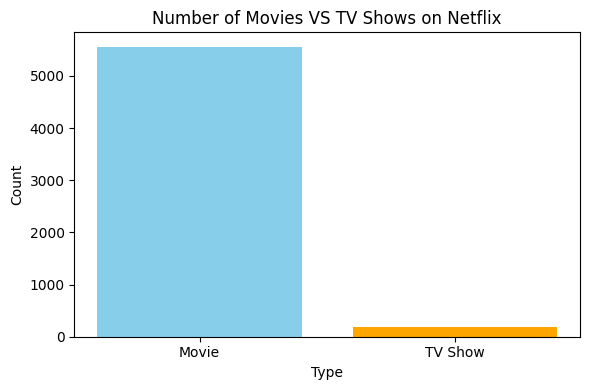

In [20]:
df_n = df.dropna(subset=['show_id','type','title','director','country','release_year','rating','duration'])

type_count = df_n['type'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_count.index,type_count,color =['skyblue','orange'])
plt.xlabel("Type")
plt.ylabel("Count")
plt.title("Number of Movies VS TV Shows on Netflix")
plt.tight_layout()
plt.savefig('movies_vs_tvshows.png',dpi=300,bbox_inches ='tight')
plt.show()

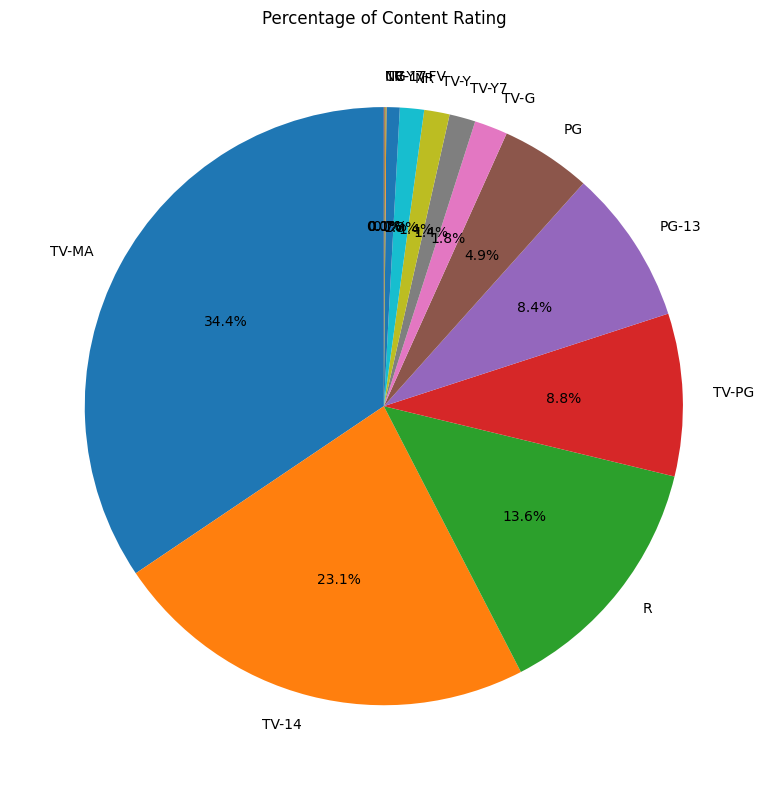

In [22]:
rating_count = df_n['rating'].value_counts()
plt.figure(figsize=(10,8))
plt.pie(rating_count,labels=rating_count.index,autopct='%1.1f%%',startangle=90)
plt.title("Percentage of Content Rating")
plt.tight_layout()
plt.savefig('content_rating_pie.png',dpi=300,bbox_inches ='tight')
plt.show()

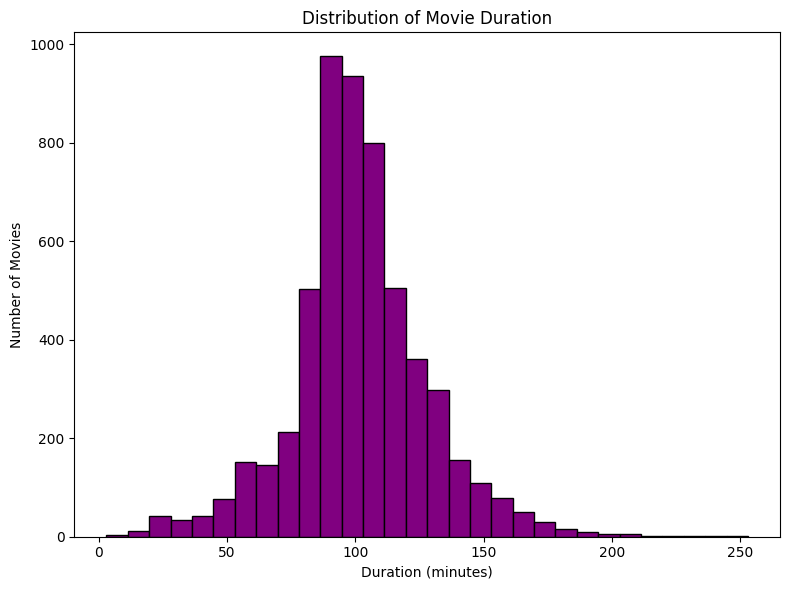

In [25]:
movie_df = df_n[df_n['type']=='Movie'].copy()
movie_df['duration_int'] =movie_df['duration'].str.replace(' min','').astype(int)
plt.figure(figsize=(8,6))
plt.hist(movie_df['duration_int'],bins=30,color='purple',edgecolor='black')
plt.title('Distribution of Movie Duration')
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of Movies")
plt.tight_layout()
plt.savefig('movies_duration_histogram.png',dpi=300,bbox_inches ='tight')
plt.show()

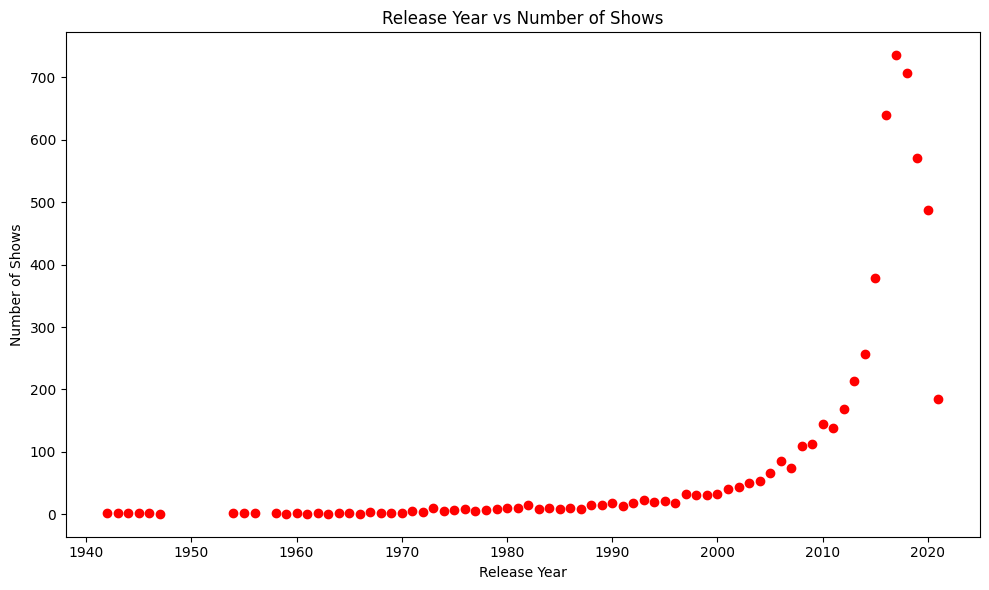

In [26]:
release_counts =df_n['release_year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.scatter(release_counts.index,release_counts.values,color='red')
plt.title("Release Year vs Number of Shows")
plt.xlabel("Release Year")
plt.ylabel("Number of Shows")
plt.tight_layout()
plt.savefig('release_year_vs_n_shows.png',dpi =300,bbox_inches='tight')
plt.show()

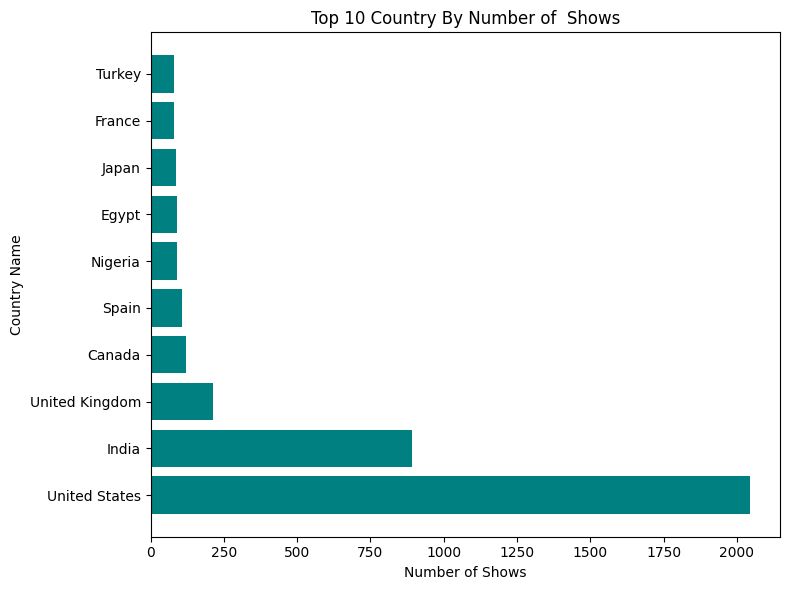

In [31]:
country_count = df_n['country'].value_counts().head(10)
plt.figure(figsize=(8,6))
plt.barh(country_count.index,country_count.values,color='teal')
plt.xlabel("Number of Shows")
plt.ylabel("Country Name")
plt.title("Top 10 Country By Number of  Shows")
plt.tight_layout()
plt.savefig('top10_country.png',dpi= 300,bbox_inches ='tight')
plt.show()

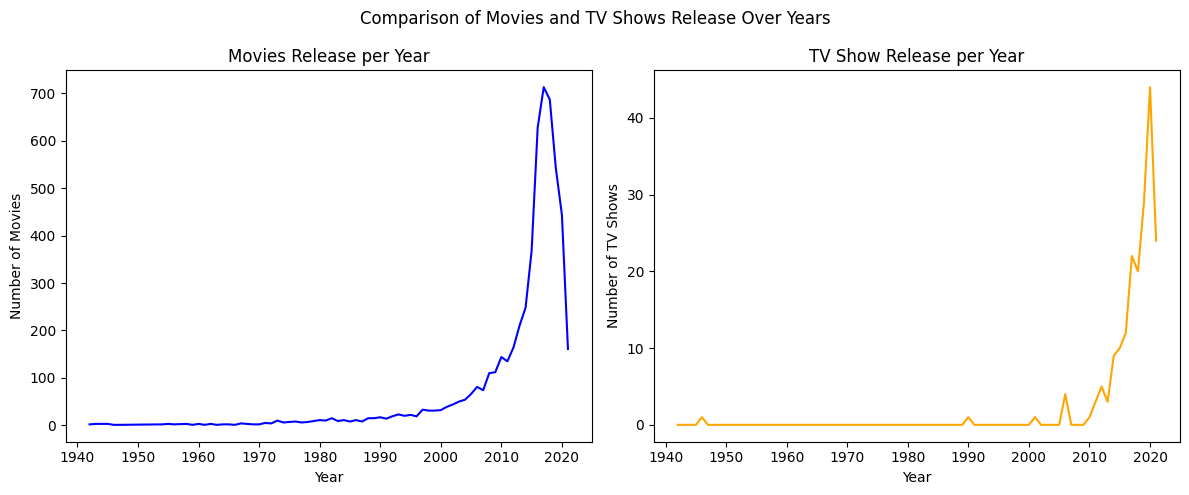

In [33]:
content_by_year= df_n.groupby(['release_year','type']).size().unstack().fillna(0)
fig,ax = plt.subplots(1,2,figsize=(12,5))

#first subplot:movies
ax[0].plot(content_by_year.index,content_by_year['Movie'],color ='blue')
ax[0].set_title("Movies Release per Year")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Number of Movies")

#second subplot:TV Shows
ax[1].plot(content_by_year.index,content_by_year['TV Show'],color='orange')
ax[1].set_title("TV Show Release per Year")
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Number of TV Shows")
fig.suptitle("Comparison of Movies and TV Shows Release Over Years")
plt.tight_layout()
plt.savefig("Movies_tvshows_release_year.png",dpi =300,bbox_inches ='tight')
plt.show()